In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import urllib.request
#import pandas as pd
from scipy.integrate import solve_ivp
from scipy.stats import linregress
from matplotlib import animation, rc
from matplotlib.animation import PillowWriter

In [22]:
rc('animation', html='html5');

## 1) Carros en un plano inclinado
Desde Galileo sabemos que los cuerpos en el vacío caen al mismo tiempo, independientemente de su masa. ¿Pero qué pasa si estos cuerpos van sobre ruedas? Considere un plano inclinado a un ángulo 𝜃 = 30°, desde el cual lanzaremos varios carros desde la misma altura 𝐻. Los carros son idénticos, de masa 𝑚, pero cada uno llevará encima una masa variable 𝑀. Asumiremos que hay buen agarre entre las ruedas del carro y el plano inclinado, por lo que la fricción entre estas dos superficies es estática y hace trabajo nulo. Sin embargo, las ruedas al rotar producen fricción líquida en sus rodamientos, la cual asumiremos que es independiente de la masa que llevan los carros encima, como debería esperarse para rodamientos de alta calidad. Modelaremos esta fricción líquida como un término 𝛾 $||\vec{v}^2||$  que resta en la ecuación de fuerzas en la dirección de la velocidad:
$$ 𝑚𝑎⃗= −𝑚𝑔⃗+ \vec{𝑁} - 𝛾 ||\vec{v}||^2 𝑣̂$$ 
La pregunta que queremos responder es, teniendo en cuenta este sistema, ¿el tiempo de caída de los carros depende de la masa que llevan encima?
Plantee las ecuaciones diferenciales por componentes y use alguno de los métodos vistos en clase para simular la caída de muchos carros con diferentes masas encima. Realice un gráfico de masa total vs tiempo de caída (el tiempo cuando 𝑦(𝑡) = 0), y escriba sus conclusiones.
Para ver más fácilmente los efectos, recomiendo usar un coeficiente de fricción grande, digamos del orden de 0.7 kg/m, y masas del orden de kilogramos.

In [23]:
# Parámetros del problema
g = 9.81  # aceleración de la gravedad en m/s^2
theta = np.radians(30)  # ángulo del plano inclinado en radianes
gamma = 0.7  # coeficiente de fricción líquida
m_carro = 1.0  # masa del carro en kg
Ms = np.linspace(0, 100, 10)  # masa variable
H = 10.0  # altura inicial


In [24]:
def sistema(t, y, m_total):
    x, v = y
    dxdt = v
    dvdt = (m_total * g * np.sin(theta) - gamma * v**2) / m_total
    return [dxdt, dvdt]

In [25]:
tiempos = []
soluciones = []

In [26]:
for M in Ms:
    sol = solve_ivp(sistema, t_span=[0, 10], y0=[0, 0], args=(m_carro + M,), method='RK45', max_step=0.01)
    tiempo_caida = next((t for t, x in zip(sol.t, sol.y[0]) if x >= H), None)
    tiempos.append(tiempo_caida)
    soluciones.append(sol)

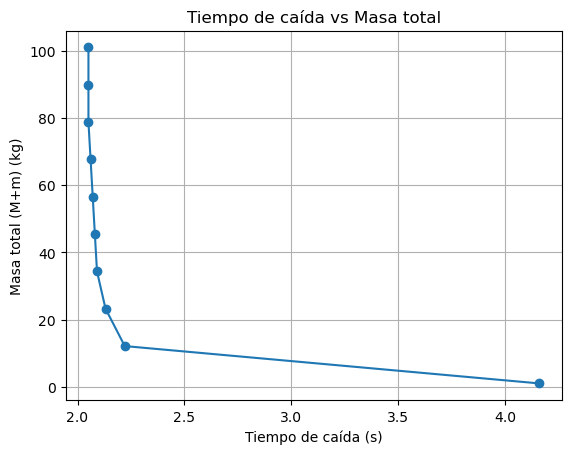

In [27]:
plt.plot(tiempos, Ms+m_carro,  'o-')
plt.ylabel('Masa total (M+m) (kg)')
plt.xlabel('Tiempo de caída (s)')
plt.title('Tiempo de caída vs Masa total')
plt.grid(True)
plt.show()

Extra: anime la posición 2D de los “carros” cayendo al mismo tiempo, cada uno como un punto cuyo
color representa su masa total. Use una escala de color continua.

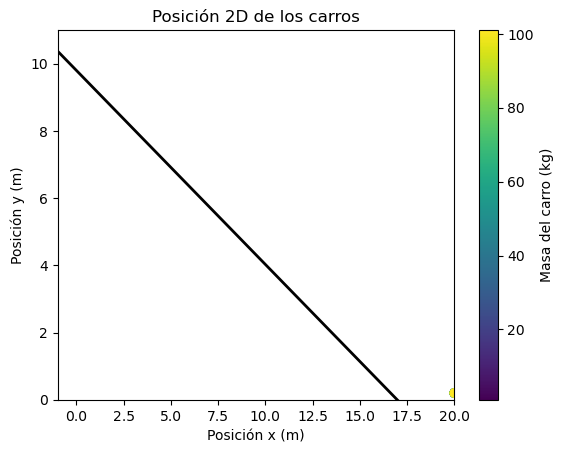

In [29]:
fig, ax = plt.subplots()

# Crear scatter plot para los carros
scatter = ax.scatter(np.zeros_like(Ms), np.zeros_like(Ms), c=Ms+m_carro, cmap='viridis')

#Plano inclinado
x_plano = np.linspace(-1, 20, 100)
y_plano = H - x_plano * np.tan(theta) - 0.2
ax.plot(x_plano, y_plano, 'k-', lw=2)

# Configurar axis
ax.set_xlabel('Posición x (m)')
ax.set_ylabel('Posición y (m)')
ax.set_title('Posición 2D de los carros')
ax.set_xlim(-1, 20)
ax.set_ylim(0, 11)

# Agregar leyenda
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Masa del carro (kg)')

# Función de actualización para la animación
def update(i):
    posiciones_x = [min(20, sol.y[0][i]) for sol in soluciones]
    posiciones_y = [max(0.2, H - sol.y[0][i] * np.tan(theta)) for sol in soluciones]
    scatter.set_offsets(np.c_[posiciones_x, posiciones_y])
    scatter.set_array(Ms+m_carro)
    if all(x >= 20 for x in posiciones_x):  # condición de parada
        ani1b.event_source.stop()
    return scatter,

# Crear animación
ani1b = animation.FuncAnimation(fig, update, frames=len(soluciones[0].t), interval = 30, blit=True)

# Guardar animación en formato .gif
writer = PillowWriter(fps=30)
ani1b.save('animacion1b.gif', writer=writer)

In [30]:
#ani1b

Luego de resolver este sistema, hacer las graficas y la simulacion se pudo observar que cuando la masa que se le agrega a la del carro esta por encima de 10kg se observara que el tiempo de caida se vuelve independiente de la masa.

## 2) Comprobación observacional de la relatividad general
Una de las pruebas sugeridas por Einstein para comprobar la validez de su teoría de la relatividad general fue observar la precesión del planeta Mercurio. El sol genera un campo gravitacional que, a cortas distancias, no se comporta como lo predice la gravedad Newtoniana (con una fuerza atractiva tipo ${1}/{r^2}$)
sino que toma una forma más complicada, por lo que los efectos relativistas deberían notarse en un
planeta como Mercurio.
La derivación completa usando la métrica de Schwarzschild pueden encontrarla aquí, pero a nosotros nos basta con saber que, como aproximación de primer orden, la fuerza producida por el sol a distancias cercanas se puede escribir de la siguiente manera:

$$\vec{F}(r)=m\frac{\mathrm{d}\vec{a}}{\mathrm{d}t}=\underbrace{-\frac{GMm}{r^2}\hat{r}}_{Newton}-\underbrace{\left({\frac{GMm}{r^2}\hat{r}}\right)\left(\frac{3L^2}{mc^2r^2}\right)}_{Schwarzschild} \hat{r}$$

donde 𝐺 es la constante de gravitación universal, 𝑀 la masa del sol, 𝑚 la masa de Mercurio, 𝑐 la velocidad de la luz y 𝐿 la magnitud del momento angular del sistema. Nótese que el término de relatividad general va como ${1}/{r^4}$.
Para escribir esto más fácilmente en un computador, definimos:
$$\mu = GM = 39.4234021 \frac{Au^2}{{Year}^2}$$
$$\alpha = 2 ( \frac{L}{mc}  )^2  = 1.09778201 \times 10 ^{−8} {Au}^2$$
y entonces
$$\vec{F} (r) = -m \frac{\mu}{r^2}\left ( 1 + \frac{\alpha}{r^2} \right )\hat{r}$$

In [31]:
# Constants
mu = 39.4234021  # Au^2/Year^2
alpha = 1.09778201e-8  # Au^2

### 2.1) Simular
Simule el sistema durante diez años t_span $= (0.,10.).$ Necesitará un paso lo suficientemente pequeño, se recomienda $10^{−3}$ si va a usar el método RK45 de solve_ivp, o $10^{−6}$ si va a simular manualmente.  
Las posiciones iniciales se obtienen de los parámetros orbitales de Mercurio:  
Semieje mayor:  $𝑎 = 0.38709893 Au $  
Excentricidad:  $𝑒 = 0.20563069$  
$$𝑥(𝑡 = 0) = 𝑎(1 + 𝑒)$$ 
$$𝑦(𝑡 = 0) = 0$$
La velocidad orbital inicial se obtiene con la ecuación de vis viva:
$$𝑣_𝑥(𝑡 = 0) = 0$$
$$v_y (t= 0) = \sqrt{\left( \frac{\mu}{𝑎} \right) \frac{1-e}{1+e}}$$

In [32]:
a = 0.38709893  # Au
e = 0.20563069
m = 1.0

In [33]:
#condiciones iniciales
x0 = a * (1 + e)
y0 = 0
vx0 = 0
vy0 = np.sqrt((mu / a) * ((1 - e) / (1 + e)))

In [34]:
#Intervalo  de tiempo
t_span = (0, 10)

In [35]:
#creo la ecuación diferencial del sistema
def equations(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    F = -m * mu / r**2 * (1 + alpha / r**2)
    ax = F * x / r
    ay = F * y / r
    return [vx, vy, ax, ay]

In [36]:
sol2 = solve_ivp(equations, t_span, [x0, y0, vx0, vy0], rtol=1e-6, atol=1e-9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


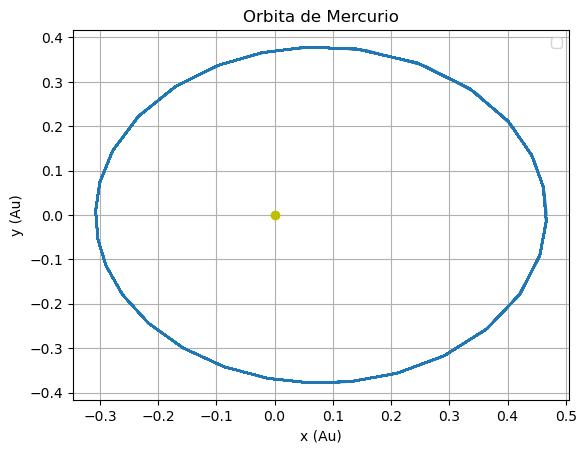

In [37]:
plt.plot(sol2.y[0], sol2.y[1])
plt.xlabel('x (Au)')
plt.ylabel('y (Au)')
plt.title('Orbita de Mercurio')
plt.grid()
plt.plot(0, 0, 'yo') #Representar el sol
plt.legend()
plt.show()

Grafique la energía del sistema. Basta con ver que $||\vec{𝑣}|| ^ 2 + \frac{𝜇} {||\vec{𝑟}||}$ oscile y no aumente ni disminuya constantemente con el tiempo. Para estas pruebas sólo simule un año.

In [38]:
#Definir la funcion de energia
def energy(state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    v2 = vx**2 + vy**2
    U = -mu / r
    return v2 + U

In [39]:
# Calcular la energia en cada salto de tiempo
E = energy(sol2.y)

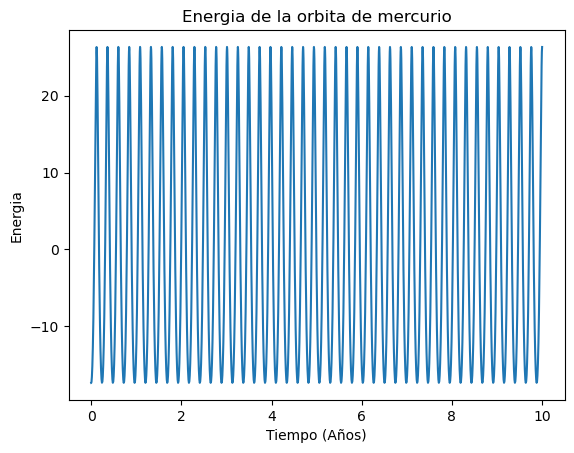

In [40]:
plt.plot(sol2.t, E)
plt.xlabel('Tiempo (Años)')
plt.ylabel('Energia')
plt.title('Energia de la orbita de mercurio')
plt.show()

Extra: exagere el efecto relativista ($𝛼 = 10^{−2}$, o algo así) y anime el planeta orbitando.

In [41]:
alphab2 = 1e-2  # Au^2 (efecto relativista exagerado)

In [42]:
def equations(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    F = -m * mu / r**2 * (1 + alphab2 / r**2)
    ax = F * x / r
    ay = F * y / r
    return [vx, vy, ax, ay]

In [43]:
solb2 = solve_ivp(equations, t_span, [x0, y0, vx0, vy0], rtol=1e-6, atol=1e-9)

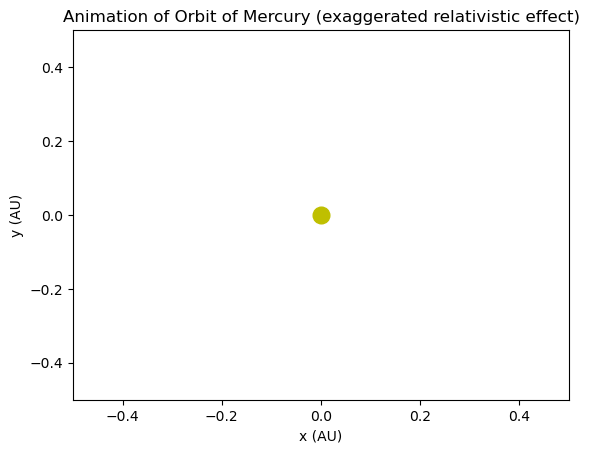

In [44]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.set_xlim(-0.5, 0.5)  # Set fixed x-axis limits for better visualization
ax.set_ylim(-0.5, 0.5)  # Set fixed y-axis limits for better visualization
ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')
ax.set_title("Animation of Orbit of Mercury (exaggerated relativistic effect)")

sun, = ax.plot(0, 0, 'yo', markersize=12, label='Sun')  # yellow Sun
line, = ax.plot([], [], 'o-', lw=2, color='green', label="Mercury's orbit") 

In [45]:
# Function to initialize the animation
def init():
    line.set_data([], [])
    return line,

# Function to update the frame in the animation
def update(frame):
    line.set_data(solb2.y[0][:frame], solb2.y[1][:frame])
    #if frame > len(solb2.t) // 4:
     #   ax.plot(solb2.y[0][frame-len(solb2.t)//4:frame], solb2.y[1][frame-len(solb2.t)//4:frame], 'b-', alpha=0.5)
    return line,

In [46]:
frames = len(solb2.y[0])

In [47]:
ax.legend()

In [48]:
# Create the animation
anib2 = animation.FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=10)
# Guardar animación en formato .gif
writer = PillowWriter(fps=30)
anib2.save('animacion2b.gif', writer=writer)

In [49]:
#anib2

Extra: En su animación marque con una línea semitransparente la trayectoria del anterior cuarto de año de la órbita. Inicie su animación en 𝑡 = 0.25.

In [57]:
quarter_year_steps = int(0.25 / 1e-5)

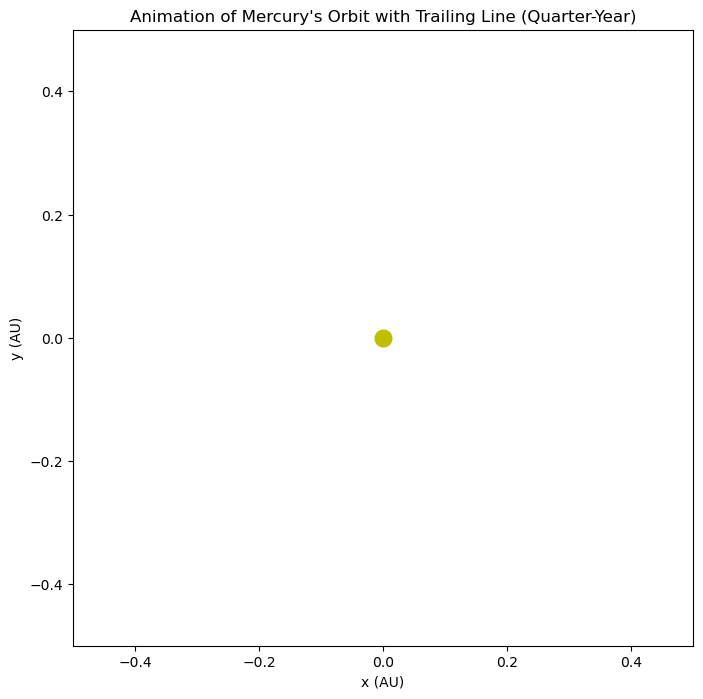

In [58]:
# Update the animation to include a trailing line representing the previous quarter-year of Mercury's orbit.

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-0.5, 0.5)  # Set fixed x-axis limits for better visualization
ax.set_ylim(-0.5, 0.5)  # Set fixed y-axis limits for better visualization
ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')
ax.set_title("Animation of Mercury's Orbit with Trailing Line (Quarter-Year)")

# Plot a fixed point for the Sun at the origin
sun, = ax.plot(0, 0, 'yo', markersize=12, label='Sun')  # yellow Sun
line, = ax.plot([], [], 'o-', lw=2, color='green', label="Mercury's orbit")  # Mercury's orbit
trail, = ax.plot([], [], lw=1, color='green', alpha=0.5)  # Semi-transparent trailing line

In [67]:
# Function to initialize the animation
def init2():
    line.set_data([], [])
    trail.set_data([], [])
    return line, trail, sun

# Function to update the frame in the animation
def update2(frame):
    line.set_data(solb2.y[0][:frame], solb2.y[1][:frame])
    
    # Mark the trajectory of the previous quarter of the year
    start_idx = max(0, frame - quarter_year_steps)
    trail.set_data(solb2.y[0][start_idx:frame], solb2.y[1][start_idx:frame])
    
    return line, trail, sun

In [68]:
# Start animation at t=0.25 (skip first 0.25 year frames)
start_frame = quarter_year_steps

# Number of frames in the animation from t=0.25 onward
frames = len(solb2.y[0]) - start_frame

In [69]:
# Add a legend to the plot
ax.legend()

In [ ]:
ani2c = animation.FuncAnimation(fig, update2, frames=range(start_frame, len(solb2.y[0])), init_func=init2, blit=True, interval=10)

In [71]:
plt.show()

In [72]:
ani2c

### 2.2) Precesión de la órbita
Ya sea con eventos o manualmente, halle los puntos donde Mercurio está más cerca (o más lejos) del sol, es decir, aquellos puntos donde la órbita cumpla $\vec{r}(t) * \vec{v} (t) = 0$.  
- Para estos puntos, halle el ángulo del vector 𝑟,⃗ preferiblemente con la función np.atan2(y,x). Estos ángulos marcan la precesión de la órbita.
- Los puntos del periastro (más cercano) tendrán ángulos cercanos a 𝜋, y los del apoastro (más lejanos) ángulos cercanos a cero o a 2𝜋.
- Para los ángulos cercanos a 𝜋, reste 𝜋
- Para los ángulos cercanos a 2𝜋, reste 2𝜋

Esto con el fin de estandarizar todos los ángulos al afelio. La gráfica de ángulo contra tiempo de estos eventos debería ser lineal y no presentar ruido. Se recomienda convertir los ángulos a grados, y después a segundos de arco (1° = 3600 arcsec), ya que el valor de referencia que se tiene observado para la precesión anómala de Mercurio es de 42.9799 arcsec / siglo, que correspondería a la pendiente de su gráfica ángulo vs tiempo.  
Compare sus resultados con este valor y discuta.

In [83]:

# Encontrar los puntos donde Mercurio está más cerca o más lejos del Sol
r_dot_v = sol2.y[0] * sol2.y[2] + sol2.y[1] * sol2.y[3]
indices = np.where(np.abs(r_dot_v) < 1e-3)[0]

# Calcular los ángulos de los vectores r en estos puntos
angulos = np.arctan2(sol2.y[1][indices], sol2.y[0][indices])

# Estandarizar los ángulos al afelio
angulos = np.where(angulos > np.pi, angulos - np.pi, angulos)
angulos = np.where(angulos > 2 * np.pi, angulos - 2 * np.pi, angulos)

# Convertir los ángulos a grados y segundos de arco
angulos_grados = np.degrees(angulos)
angulos_arcsec = angulos_grados * 3600

In [84]:
print(indices)

[0 1]


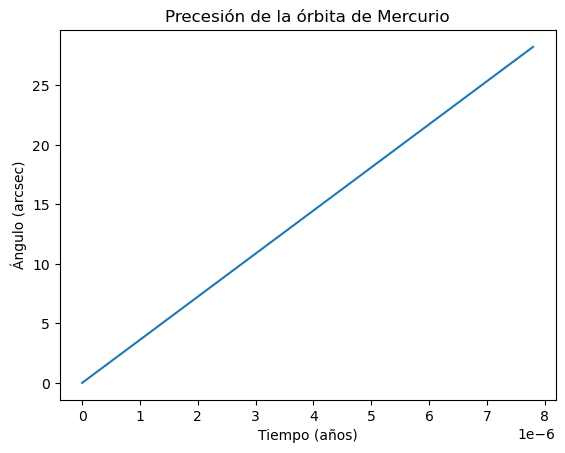

In [85]:
# Graficar los ángulos contra el tiempo
plt.plot(sol2.t[indices], angulos_arcsec)
plt.xlabel('Tiempo (años)')
plt.ylabel('Ángulo (arcsec)')
plt.title('Precesión de la órbita de Mercurio')
plt.show()

In [86]:
slope, intercept, r_value, p_value, std_err = linregress(sol.t[indices], angulos_arcsec)

In [87]:
precesion_anomala = slope  # arcsec/año
precesion_anomala_siglo = np.abs(precesion_anomala * 0.01)  # arcsec/siglo

In [88]:
print("La pendiente de la recta o también llamada " + f"Precesión anómala: {precesion_anomala_siglo:.4f} arcsec/siglo")

La pendiente de la recta o también llamada Precesión anómala: 2822.6515 arcsec/siglo


## 3) Cuantización de la energía
La ecuación de Schrödinger fue controversial en su día, mucho antes de que existiera cualquier interpretación de la mecánica cuántica. Parte de esta controversia se debía a que no reproducía algunos efectos encontrados en espectros atómicos, pero también estaba la preocupación de que dicha ecuación producía soluciones divergentes, aún en los casos más sencillos.
Ignorando la filosofía del asunto, el caso más sencillo es la ecuación aplicada al oscilador armónico, que, en su forma adimensional, dice:
$$  x^2f(x)- \frac{\mathrm{d} ^2 f(x)}{\mathrm{d} x ^2} = 2Ef(x)$$  
Donde $𝑥$ es la posición, $𝑓(𝑥)$ es una onda que de alguna manera caracteriza la partícula oscilando, y 𝐸 es algún tipo de energía asociada a esta onda. El problema era que la solución de esta ecuación diferencial era divergente para la mayoría de valores de 𝐸. Sólo algunos valores muy específicos retornaban una solución de $𝑓(𝑥)$ que no divergía con 𝑥 grande.


Para esto, solucione numéricamente la ecuación diferencial en el espacio 𝑥 ∈ [0, 6] con las siguientes configuraciones de condiciones iniciales:  
$ f(x=0)$ En forma simetrica 1 & en forma antisimetrica 0$  
$ f'(x=0)$ En forma simetrica 0 & en forma antisimetrica 1$
Encuentre al menos cinco energías 𝐸 para cada forma. Para verificar si su solución diverge o no, puede usar condiciones sobre la función ($𝑓(6) <$ algo), sobre la derivada ($𝑓′(6) <$ algo) o alguna combinación de ambas (por ejemplo $𝑓(6)𝑓′(6) <$ algo o $√𝑓(6)2 + 𝑓'(6)2 <$ algo).

In [2]:
def schrodinger(x, y, E):
    f, df_dx = y
    d2f_dx2 = (x**2 - 2*E)*f
    
    return [df_dx, d2f_dx2]

In [ ]:
x_range = [0, 6]

In [3]:
#Utilizamos este rango de energías, pues ya sabemos que las 5 primeras energías para cada caso son menores a 10, así no perdemos tiempo. 
energies = np.arange(0.1, 10, 0.001)

#Aquí definimos la tolerancia para considerar una solución como convergente
tolerance = 1

allowed_energies_symmetric = [] # Aquí vamos a ingresar las energías permitidas que encontremos para el caso simétrico
allowed_energies_antisymmetric = [] # O antisimétrico. 


for energia in energies:
    sol = solve_ivp(schrodinger, x_range, [1, 0], args=(energia,), max_step=0.1)
    sol_antisymmetric = solve_ivp(schrodinger, x_range, [0, 1], args=(energia,), max_step=0.1)
    
    
    if np.sqrt(abs(sol.y[0,-1])**2 + abs(sol.y[1,-1])**2) < tolerance:
        
        if len(allowed_energies_symmetric)==0:
            allowed_energies_symmetric.append(energia)
            
        else:
            if len(allowed_energies_symmetric)<5: 
                cierre_bucle=True
                
                for energia_simetrica in allowed_energies_symmetric: 
                    
                    if energia_simetrica - 0.9 <= energia and energia<= energia_simetrica +0.9:
                        cierre_bucle=False
                
                if cierre_bucle:
                    allowed_energies_symmetric.append(energia)
    
    if np.sqrt(abs(sol_antisymmetric.y[0,-1])**2 + abs(sol_antisymmetric.y[1,-1])**2) < tolerance:
        
        if len(allowed_energies_antisymmetric)==0:
            allowed_energies_antisymmetric.append(energia)
            
        else:
            if len(allowed_energies_antisymmetric)<5: 
                cierre_bucle=True
                
                for energia_antisimetrica in allowed_energies_antisymmetric: 
                    
                    if energia_antisimetrica - 0.9 <= energia and energia<= energia_antisimetrica +0.9:
                        cierre_bucle=False
                
                if cierre_bucle:
                    allowed_energies_antisymmetric.append(energia)


print("Energías permitidas (forma simétrica):", allowed_energies_symmetric)
print("Energías permitidas (forma antisimétrica):", allowed_energies_antisymmetric)

Energías permitidas (forma simétrica): [0.5000000000000003, 2.500000000000002, 4.5000000000000036, 6.500000000000005, 8.500000000000007]
Energías permitidas (forma antisimétrica): [1.5000000000000013, 3.500000000000003, 5.500000000000004, 7.499000000000006, 9.492000000000008]


Extra: Investigue e implemente el método de Numerov para su solución.

Extra: Defina su espacio como una grilla de 𝑁 puntos 𝑥⃗ = (𝑥0, 𝑥1,…𝑥𝑁−1) separados por una distancia
Δ𝑥. Luego, defina el operador de segunda derivada como la matriz 𝑁 × 𝑁 y escriba la ecuación diferencial en forma matricial como un problema de vectores propios.  
Use scipy.linalg.eig para obtener los valores propios (las energías) y los vectores propios (las 𝑓) de esta matriz 𝑆. Elija los cinco menores valores propios, grafique y compare con la solución anterior.